# Drug Classification


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

In [77]:
df=pd.read_csv("C:/Users/HP/Downloads/archive (19)/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [78]:
#categories=[]
#from sklearn.preprocessing import LabelEncoder
#for col in categories:
   # if df[col].dtype == 'object':
      #  categoricals.append(col)

In [79]:
#le=LabelEncoder()
#for col in categories:
 #   df[col]=le.fit_transform(df[col])
#df.head

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [81]:
df.shape

(200, 6)

In [82]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [83]:
df['Drug'].value_counts()
df['Drug'] = df['Drug'].map({'DrugY': 0, 'drugX': 1, 'drugA': 2, 'drugC': 3, 'drugB': 4})
print(df)

     Age Sex      BP Cholesterol  Na_to_K  Drug
0     23   F    HIGH        HIGH   25.355     0
1     47   M     LOW        HIGH   13.093     3
2     47   M     LOW        HIGH   10.114     3
3     28   F  NORMAL        HIGH    7.798     1
4     61   F     LOW        HIGH   18.043     0
..   ...  ..     ...         ...      ...   ...
195   56   F     LOW        HIGH   11.567     3
196   16   M     LOW        HIGH   12.006     3
197   52   M  NORMAL        HIGH    9.894     1
198   23   M  NORMAL      NORMAL   14.020     1
199   40   F     LOW      NORMAL   11.349     1

[200 rows x 6 columns]


In [84]:
df['Cholesterol'].value_counts()
df['Cholesterol']=df['Cholesterol'].map({'HIGH':1,'NORMAL':0})
print(df)

     Age Sex      BP  Cholesterol  Na_to_K  Drug
0     23   F    HIGH            1   25.355     0
1     47   M     LOW            1   13.093     3
2     47   M     LOW            1   10.114     3
3     28   F  NORMAL            1    7.798     1
4     61   F     LOW            1   18.043     0
..   ...  ..     ...          ...      ...   ...
195   56   F     LOW            1   11.567     3
196   16   M     LOW            1   12.006     3
197   52   M  NORMAL            1    9.894     1
198   23   M  NORMAL            0   14.020     1
199   40   F     LOW            0   11.349     1

[200 rows x 6 columns]


In [85]:
df['Sex'].value_counts()
df['Sex']=df['Sex'].map({'M':1,'F':0})

In [86]:
df['BP'].value_counts()
df['BP']=df['BP'].map({'HIGH':0,'LOW':1,'NORMAL':2})

In [87]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,0
1,47,1,1,1,13.093,3
2,47,1,1,1,10.114,3
3,28,0,2,1,7.798,1
4,61,0,1,1,18.043,0


In [98]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.515000,16.084485,1.060000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.270619
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,1.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,2.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


<AxesSubplot:>

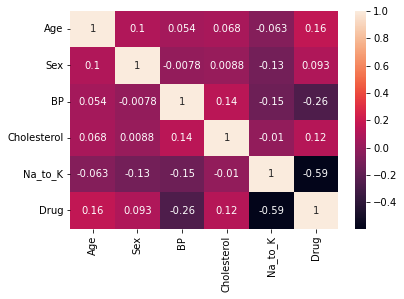

In [94]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [152]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
df.keys()

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [105]:
x=df.drop('Drug',axis=1)
y=df['Drug']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160,)
(40,)


In [123]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [124]:
y_pred=sv.predict(x_test)
score=accuracy_score(y_test,y_pred)
score*100

82.5

In [130]:
y_prr=sv.predict(x_train)
score_2=accuracy_score(y_prr,y_train)
score_2*100

68.75

In [131]:
from sklearn.model_selection import GridSearchCV

In [160]:
#rbf= radial bias function
parameters = [{'kernel': ['linear'], 'C': [1, 5, 10, 20, 40, 80, 160, 320]},
              {'kernel': ['rbf'], 'C': [1, 5, 10, 20, 40, 80, 160, 320], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [2, 3, 4], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}]

gs = GridSearchCV(sv, parameters, cv=3)
gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(C=1, kernel='linear'),
             param_grid=[{'C': [1, 5, 10, 20, 40, 80, 160, 320],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 20, 40, 80, 160, 320],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}])

In [143]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

In [146]:
svc=SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [147]:
pred_y=svc.predict(x_test)
pred_y2=svc.predict(x_train)

In [149]:
scores_test=accuracy_score(y_test,pred_y)
scores_train=accuracy_score(pred_y2,y_train)

In [150]:
scores_test*100

100.0

In [151]:
scores_train*100

100.0

<AxesSubplot:>

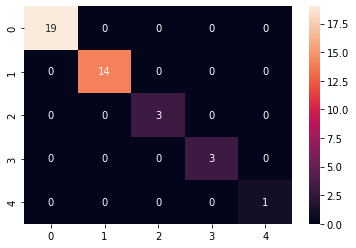

In [156]:
#confusion matrix test
matrix_test=confusion_matrix(y_test,pred_y)
sns.heatmap(matrix_test,annot=True)

<AxesSubplot:>

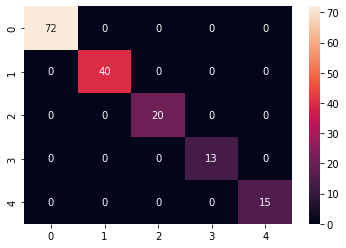

In [157]:
#confusion matrix train
matrix_train=confusion_matrix(pred_y2,y_train)
sns.heatmap(matrix_train,annot=True)

In [159]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.70      0.82        20
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.82        40
   macro avg       0.40      0.33      0.36        40
weighted avg       1.00      0.82      0.90        40



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
